In [178]:
# Laura Brancato (i6229390) 
# Olga Glazunova (i6369232)
# Simone Lamme (i6227946)
# Jorieke Schellekens (i6368804)
# Daphne Silvertand (i6227826) 
# Lena Strobl (i6368666)

In [179]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy
import pandas as pd

from miniML import *

In [180]:
## As before, load your dataset
## =============================

# We load the data cleaned in the previous assignment: data_normalized.csv
# We normalized our data in Assignment 2, however, after gathering more information we found out that we didn't have to normalize the "Symptoms" feature. We updated our Assignment 2 accordingly but already after the submission deadline. In this assignment we use the correct version of the normalized dataset. 

data = pd.read_csv("data_normalized.csv")
target = data["Diagnosis"]

# # Sampling, to speed up calculations for testing purposes or in case of a slow PC, since our dataset contains > 11 000 samples.
# # This check ensures that all 13 diagnoses are present in the sample (which isn't always the case):
# while True:
#     data = pd.read_csv("data_normalized.csv").sample(1500)
#     target = data["Diagnosis"]
#     if len(set(target)) == 13:
#         break

# Since "Diagnosis" feature was mapped to integers in Assignment 2 (thus in the normalized dataset we are using here), we introduce a new variable that contains the list of the original diagnoses names in case we need them later:
list_of_diagnoses = ['atrial_fibrillation', 'atrial_flutter', 'brady_episode', 'bradycardia', 'extrasystoles_big_episode', 'extrasystoles_bigminy', 'extrasystoles_frequent', 'extrasystoles_isolated', 'extrasystoles_trig_episode', 'extrasystoles_trigeminy', 'sinus', 'tachy_episode', 'tachycardia']

print(target.describe())
print(data.head())
print(data.columns)

count    11049.000000
mean         4.124898
std          4.715433
min          0.000000
25%          0.000000
50%          0.000000
75%         10.000000
max         12.000000
Name: Diagnosis, dtype: float64
   Diagnosis  chest_pains  confused  fatigue  lightheaded  no_symptoms  other  \
0          0            0         0        0            0            1      0   
1          0            0         0        0            0            1      0   
2          0            0         0        0            0            1      0   
3          0            0         0        0            0            1      0   
4          0            0         0        0            0            1      0   

   palpitations  shortness_of_breath  Heart rate (BPM)  ...  twoUVm(%)  \
0             0                    0          0.587461  ...   1.016109   
1             0                    0         -0.174362  ...   0.058935   
2             0                    0          0.460490  ...   1.044380   
3        

In [181]:
data = data.values
target = target.values

In [182]:
## Let's use k-means clustering on your data!
## ==========================================
    
km=KMeans(k=3)
pred_target=km.cluster(data) 

Text(0, 0.5, 'pNN50(%)')

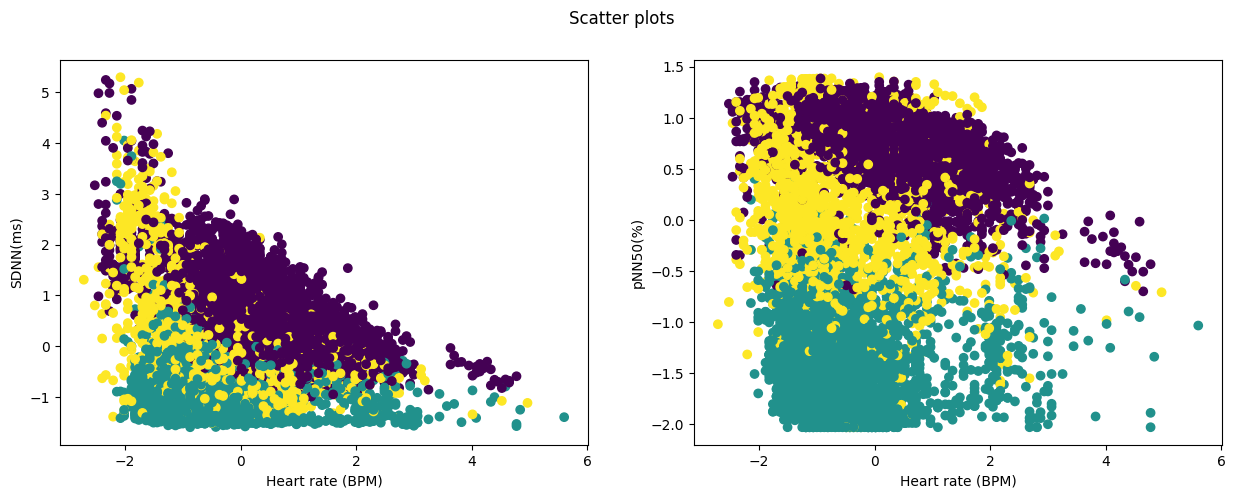

In [183]:
## Visualize the clustering with a scatter plot
## ============================================

# Visualization of the clustering for two sets of two continuous features with a scatter plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("Scatter plots")

# We plot the data points in a scatter plot, with the heart rate (BPM) on the x-axis and the SDNN(ms) on the y-axis. We use the predicted target as the color of the data points.
ax1.scatter(data[:,9],data[:,12],c=pred_target, cmap='viridis')
ax1.set_xlabel("Heart rate (BPM)")
ax1.set_ylabel("SDNN(ms)") # SDNN(ms): the standard deviation of intervals

# We plot the data points in a scatter plot, with the heart rate (BPM) on the x-axis and the pNN50(%) on the y-axis. We use the predicted target as the color of the data points.
ax2.scatter(data[:,9],data[:,15],c=pred_target, cmap='viridis')
ax2.set_xlabel("Heart rate (BPM)")
ax2.set_ylabel("pNN50(%)") # pNN50(%): the percentage of the successive intervals that are greater than 50ms

Which k did you choose and why?

In [184]:
# We chose k = 3 based on visual inspection, as increasing clusters led to chaotic patterns. By limiting the number of clusters to three, different patterns were captures with little complexity, resulting in a clearer representation of the underlying structure of the data.

## Hierarchical clustering

In [185]:
## Calculate the complete distance matrix from all your samples to all others.
## ============================================================================

dists=np.zeros((data.shape[0],data.shape[0]))

for i in range(data.shape[0]):
    for j in range(i+1,data.shape[0]):
        dists[i,j]=euclidNorm(data[i,:]-data[j,:])
        # dists[i,j]=maxNorm(data[i,:]-data[j,:])
        # dists[i,j]=sumNorm(data[i,:]-data[j,:])

Which distance metric did you use? Why?

In [186]:
# We use the Euclidean distance metric because it is the most common distance metric, and it is the default distance metric in scipy. 
# In theory, maxNorm could give us a boost in performance, because it's calculations are less complex than for the other two, but in practice we didn't notice any significant difference.

Text(0, 0.5, 'Samples')

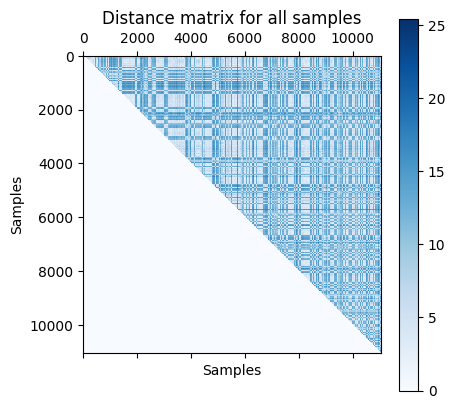

In [187]:
## Visualize it as a heatmap!
## ==========================

plt.matshow(dists,cmap='Blues')
plt.colorbar()  
plt.title("Distance matrix for all samples")
plt.xlabel("Samples")
plt.ylabel("Samples")

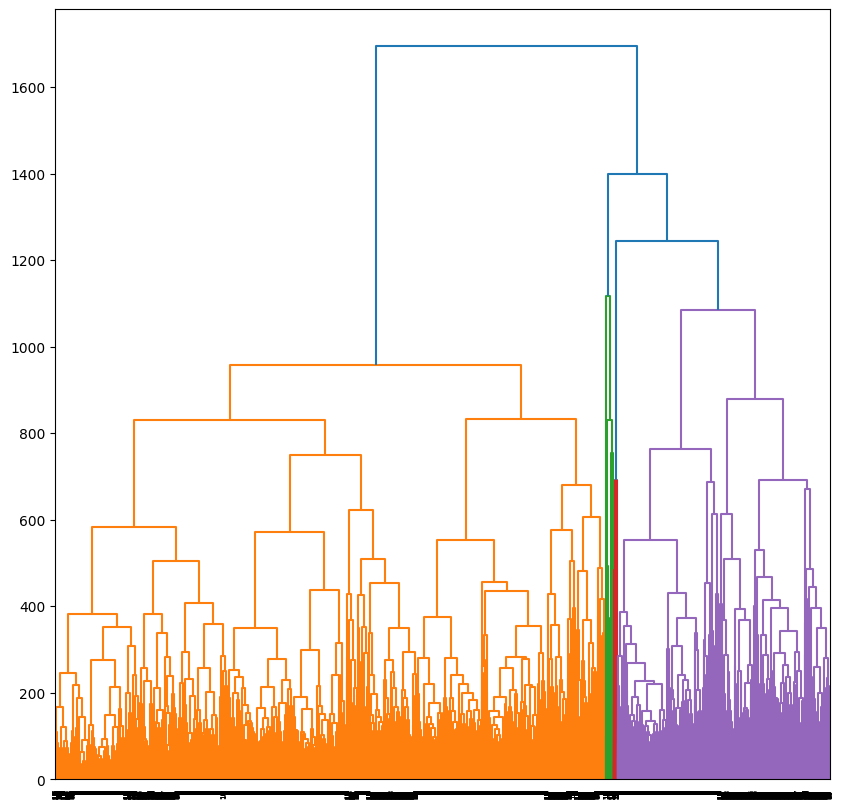

In [188]:
## Apply Agglomerative Hierarchical Cluster Algorithm to this distance matrix
## ==========================================================================

fig, ax=plt.subplots(figsize=(10, 10))
z=hierarchy.linkage(dists,method='complete') # Farthest Point Algorithm or Voor Hees Algorithm
# z=hierarchy.linkage(dists,method='single') # Nearest Point Algorithm
# z=hierarchy.linkage(dists,method='average') # UPGMA
# z=hierarchy.linkage(dists,method='centroid') # UPGMC
dn = hierarchy.dendrogram(z, ax=ax, labels=target, orientation='top')

Which linkage criterion did you use? Why?

In [189]:
# We chose the linkage criterion 'complete', because on the plot it shows the clearest separation between the clusters.

### Compare the clustering of the two methods to the actual labels. Which one works better on your data?

In [190]:
# We calculate the accuracy of the clustering methods to compare them. We use the accuracy function from the miniML.py file, which is based on the accuracy function from the scikit-learn library, but with adjustments to check for empty lists
def accuracy(prediction, reference):
    if len(reference) == 0:
        return 0.0
    correct = np.sum(prediction == reference)
    return float(correct) / len(reference)

# Accuracy of k-means clustering
accuracy_km = accuracy(target, pred_target)
print("Accuracy of k-means clustering: ", accuracy_km)

# Accuracy of hierarchical clustering
# We need to convert the labels to integers, because the hierarchical clustering algorithm only accepts integers as labels
target_int = []
for i in range(len(target)):
    for j in range(len(list_of_diagnoses)):
        if target[i] == list_of_diagnoses[j]:
            target_int.append(j)
            break
            
pred_target_int = []
for i in range(len(pred_target)):
    for j in range(len(list_of_diagnoses)):
        if pred_target[i] == list_of_diagnoses[j]:
            pred_target_int.append(j)
            break

accuracy_hc = accuracy(target_int, pred_target_int)
print("Accuracy of hierarchical clustering: ", accuracy_hc)

Accuracy of k-means clustering:  0.5464747940990135
Accuracy of hierarchical clustering:  0.0


In [191]:
# The k-means clustering works better on our data.
# The accuracy of the k-means clustering is 0.55, while the accuracy of the hierarchical clustering is 0.0. This is because the hierarchical clustering algorithm is not able to separate the clusters as clearly as the k-means clustering algorithm. Our data is not very suitable for hierarchical clustering, because the medical diagnoses are not very similar to each other, and the hierarchical clustering algorithm is based on the similarity of the data points.